# INF391 - Tarea 2

En esta tarea se utilizará clustering jerárquico para segmentar clientes reales en diferentes grupos basados en sus compras.



In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
import numpy as np

In [3]:
data = pd.read_csv('shopping-data.csv', delimiter=',')

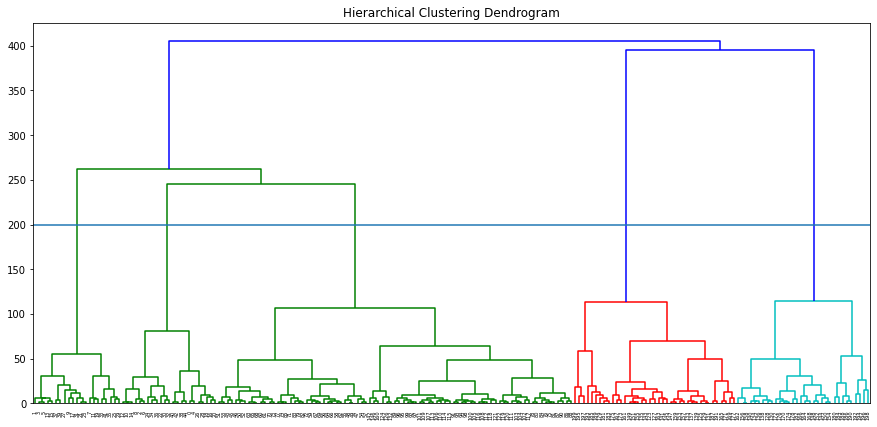

In [4]:
data1 = pd.DataFrame({"GASTOS": np.array(data["GASTOS"]), "INGRESOS": np.array(data["INGRESOS"])}).to_numpy()

x = data1[:, 0]#GASTOS
y = data1[:, 1]#INGRESOS

plt.figure(figsize=(15, 7))
plt.title("Hierarchical Clustering Dendrogram")
plt.axhline(y = 200)
dend = shc.dendrogram(shc.linkage(data1, method='ward'))

Es posible notar, que dentro de los clusters generados, los que se encuentran mas compactos, son los 5 clusters de mas abajo, se trazó una linea para hacer elección de estos, a continuación se genera una visualización de los clusters generados. 

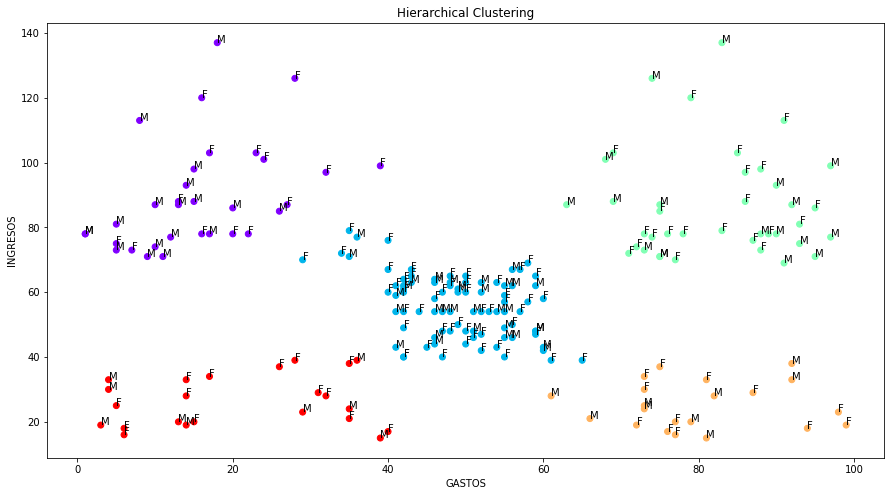

In [6]:
ward = AgglomerativeClustering(n_clusters= 5).fit(data1)
cluster = ward.fit_predict(data1)
genre = np.array(data["GENERO"])

plt.figure(figsize=(15,8))
plt.title('Hierarchical Clustering')
plt.scatter(x, y, c=cluster, cmap='rainbow')
for i, label in enumerate(genre):
    plt.annotate(label, (x[i], y[i]))
    
plt.xlabel("GASTOS")
plt.ylabel("INGRESOS")
plt.show()

Los INGRESOS están en miles de dólares y GASTOS es un número entre 1 y 100 que indica con qué frecuencia una persona gasta dinero en un centro comercial.

**Objetivos**
* Generar un dendrograma y realizar un corte para formar clusters. 
* Graficar los datos agrupados y analizar los clusters encontrados. 

**Preguntas**
* ¿Qué tipo de consumidor pertenece a cada cluster?.
* ¿Qué grupo genera mayor interés para un local de comercio?. 
* ¿Tiene algo que ver el género de una persona con el gasto?. Una visualización que podría ayudar es usar la etiqueta GENERO como marca del punto.

Pregunta 1) 
- El clúster de color morado corresponde a las personas que poseen una menor cantidad de gastos, pero que poseen una mayor cantidad de ingresos.

- El clúster de color rojo, corresponden al de las personas que poseen menos gastos y que perciben una cantidad menor de ingresos.

- El clúster de color celeste corresponde al de las personas que si bien no poseen una gran cantidad de ingresos, tampoco tienen una cantidad de gastos muy grande.

- El clúster de color verde corresponde al de las personas que perciben una gran cantidad de ingresos, y que gastan más.

- Mientras que el clúster de color amarillo corresponde al de las personas que más gastas pero que perciben una cantidad de ingresos menor.


Pregunta 2)

- El grupo de color amarillo puede significar interés, es muy probable que este grupo tienda a endeudarse más, al no poseer los ingresos necesarios para pagar sus gastos.

- El grupo de color morado también puede ser de gran interés, cabe notar que, a pesar de percibir altos ingresos, sus gastos son mínimos, quizás el local comercial podría poner un mayor incentivo de forma que logren hacer que este grupo genere más gastos.

- El grupo verde puede ser de interés, son los que más gastan y a la vez poseen una mayor cantidad de ingresos, quizás sería buena idea darles algún tipo de regalía por ser buenos clientes y estudiar el tipo de productos que consumen.


Pregunta 3)

- No es posible notar alguna relación en cuanto al género en los grupos generados, hay una cantidad bastante parecida tanto de hombres como de mujeres, por lo tanto, no es posible concluir algo al respecto.